<a href="https://colab.research.google.com/github/jlaurant/j/blob/master/petAdoptionSpeedPrediction_rv1030.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DSBA 6211 Project

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import math
from matplotlib.pyplot import figure

# The command below means that the output of multiple commands in a cell will be output at once
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# The command below tells jupyter to display up to 80 columns, this keeps everything visible
pd.set_option('display.max_columns', 80)
pd.set_option('expand_frame_repr', True)

# Show figures in notebook
%matplotlib inline
plt.style.use('ggplot')

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Import the data

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# import the training set
df = pd.read_csv('/content/drive/My Drive/6211 - project/pet-adoption-prediction/train/train.csv')

In [0]:
# import a copy of the original data
df_org=pd.read_csv('/content/drive/My Drive/6211 - project/pet-adoption-prediction/train/train.csv')

# Check the data

In [0]:
# check the columns of the training set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 21 columns):
Type             14993 non-null int64
Name             14993 non-null int64
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
VideoAmt         14993 non-null int64
PhotoAmt         14993 non-null float64
AdoptionSpeed    14993 non-null int64
dtypes: float64(1), int64(20)
memory usage: 2.4 MB


In [0]:
# check the first 5 rows of the training set
df.describe()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,0.916161,10.452078,421.005603,157.206963,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,36440.057560,0.056760,3.889215,0.720069
std,0.498217,0.277156,18.155790,280.870346,309.704867,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,11151.107932,0.346185,3.487810,0.448980
min,1.000000,0.000000,0.000000,141.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,11111.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,2.000000,266.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,0.000000
50%,1.000000,1.000000,3.000000,307.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,1.000000
75%,2.000000,1.000000,12.000000,307.000000,266.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,1.000000
max,2.000000,1.000000,255.000000,999.000000,999.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41401.000000,8.000000,30.000000,1.000000


# Data Visualization

In [0]:
def type(df): 
    
    if df.Type == 1:
        df.Type= 'Dog'
    else:
        df.Type = 'Cat'
    return df
  
df=df.apply(type, axis=1)

In [0]:
def gender(df): 
    
    if df.Gender == 1:
        df.Gender = 'Male'
    elif df.Gender == 2:
        df.Gender = 'Female'
    else:
        df.Gender = 'Mixed'
    return df
  
df=df.apply(gender, axis=1)

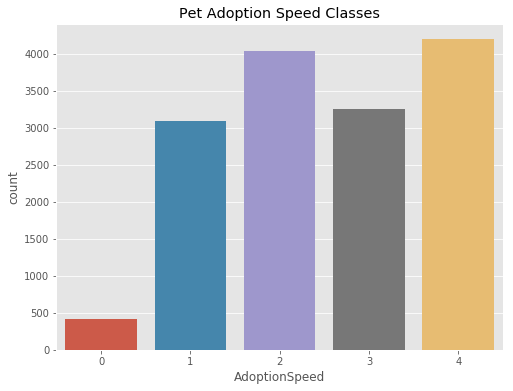

In [0]:
# Visualize the output variable
plt.figure(figsize=(8, 6));
sns.countplot(x='AdoptionSpeed',data=df)
plt.title('Pet Adoption Speed Classes');

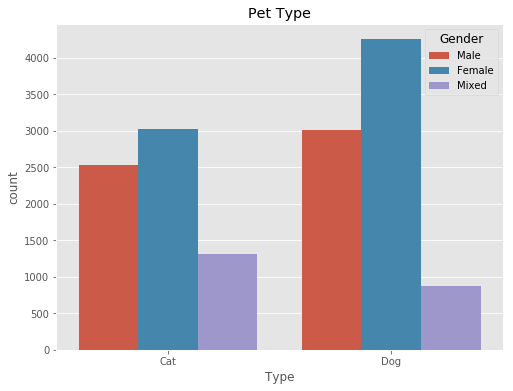

In [0]:
# visualize the pet type count
plt.figure(figsize=(8, 6));
sns.countplot(hue='Gender', x='Type',data=df)
plt.title('Pet Type');

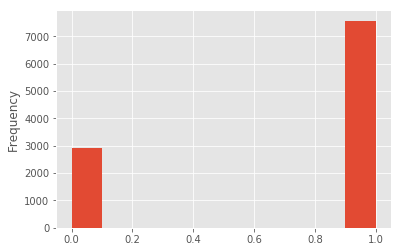

In [0]:
#checking the dist. of outcome variable
y_train.plot('hist')

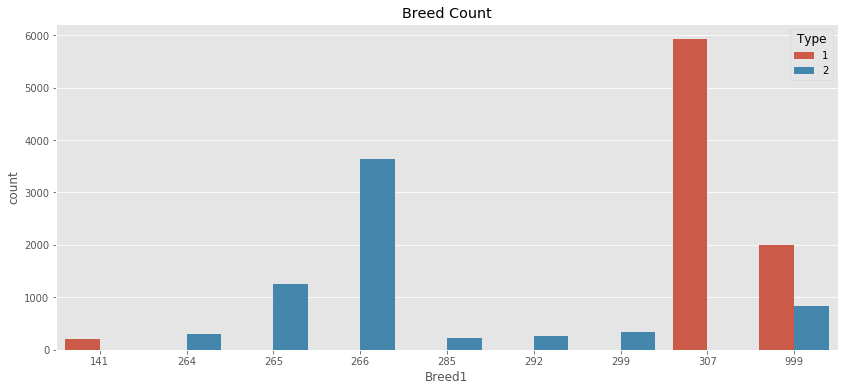

In [0]:
plt.figure(figsize=(14, 6));
sns.countplot(hue='Type', x='Breed1',data=df)
plt.title('Breed Count');

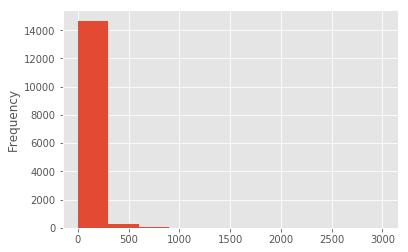

In [0]:
_ordf.Fee.plot('hist')

# Data Cleaning

There are too many breed categories. Let's group some of the smaller categories.

In [43]:
df.loc[df['Type'] == 2].Breed1.value_counts().head(10)

266    3634
265    1258
299     342
264     296
292     264
285     221
254     105
243      94
283      73
247      71
Name: Breed1, dtype: int64

In [0]:
df.loc[df['Type'] == 1].Breed1.value_counts().head(10)

307    5923
141     205
205     189
179     167
218     161
109     151
103      98
20       90
213      89
189      88
Name: Breed1, dtype: int64

In [0]:
# create a function to change the uncommon breeds (count < 200) into '999'
def Breed1(df): 
    
    if df.Breed1 not in [20,103,109,141,179,189,205,213,218,266,265,299,264,292,285, 254, 243,283,247,307]:
        df.Breed1= 999
    else:
        df.Breed1 = df.Breed1
    return df
  
df=df.apply(Breed1, axis=1)

In [47]:
# check the results
df.Breed1.value_counts()

307    5927
266    3634
999    1468
265    1258
299     342
264     296
292     264
285     221
141     205
205     190
179     167
218     162
109     151
254     105
103      98
243      94
20       90
213      89
189      88
283      73
247      71
Name: Breed1, dtype: int64

In [48]:
df.Breed2.value_counts().head(10)

0      10762
307     1727
266      599
265      321
299      138
264      125
292      105
218       91
141       86
285       78
Name: Breed2, dtype: int64

In [0]:
# create a function to change the uncommon breeds into 'others'
def Breed2(df): 
    
    if df.Breed2 not in [0]:
        df.Breed2= 999
    else:
        df.Breed2 = df.Breed2
    return df
  
df=df.apply(Breed2, axis=1)

In [50]:
# check the results
df.Breed2.value_counts()

0      10762
999     4231
Name: Breed2, dtype: int64

In [0]:
def names(df):
  if pd.notnull(df.Name) == True:
    df.Name = 1
  else:
    df.Name=0
  return df

df=df.apply(names, axis=1)

In [0]:
# use 0 to represent the pet was not adopted, use 1 to represent the pet was adopted
def adopted(df):
  if df.AdoptionSpeed not in [0,1,2,3]:
        df.AdoptionSpeed= 0
  else:
        df.AdoptionSpeed = 1
  return df

df=df.apply(adopted, axis=1)

In [53]:
df.State.value_counts()

41326    8714
41401    3845
41327     843
41336     507
41330     420
41332     253
41324     137
41325     110
41335      85
41361      26
41345      22
41367      15
41342      13
41415       3
Name: State, dtype: int64

In [0]:
def state(df):
  if df.State not in [41326, 41401, 41327, 41336]:
        df.State= 11111
  else:
        df.State = df.State
  return df

df=df.apply(state, axis=1)

In [0]:
df.State.value_counts()

41326    8714
41401    3845
11111    2434
Name: State, dtype: int64

# Data processing

In [0]:
# drop the columns we do not need for now
df = df.drop(['RescuerID','Description','PetID','Color2', 'Color3'], axis=1)

In [145]:
df.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1',
       'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized',
       'Health', 'Quantity', 'Fee', 'State', 'VideoAmt', 'PhotoAmt',
       'AdoptionSpeed'],
      dtype='object')

In [146]:
df.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
0,2,1,3,299,0,1,1,1,1,2,2,2,1,1,100,41326,0,1.0,1
1,2,1,1,265,0,1,1,2,2,3,3,3,1,1,0,41401,0,2.0,1
2,1,1,1,307,0,1,2,2,2,1,1,2,1,1,0,41326,0,7.0,1
3,1,1,4,307,0,2,1,2,1,1,1,2,1,1,150,41401,0,8.0,1
4,1,1,1,307,0,1,1,2,1,2,2,2,1,1,0,41326,0,3.0,1


In [0]:
# check the numerical columns
df[['Fee','Age','VideoAmt','PhotoAmt','Quantity']].describe()

,Fee,Age,VideoAmt,PhotoAmt,Quantity
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,21.259988,10.452078,0.056760,3.889215,1.576069
std,78.414548,18.155790,0.346185,3.487810,1.472477
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,2.000000,1.000000
50%,0.000000,3.000000,0.000000,3.000000,1.000000
75%,0.000000,12.000000,0.000000,5.000000,1.000000
max,3000.000000,255.000000,8.000000,30.000000,20.000000


In [0]:
# prepare the data for recoding
X_cat=df.drop(['AdoptionSpeed','Fee','Age','VideoAmt','PhotoAmt','Quantity'],axis=1)
y=df.AdoptionSpeed

In [151]:
X_cat.columns

AttributeError: ignored

In [0]:
# using OneHotEncoder
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder(drop='first',categories='auto')
X_cat=enc.fit_transform(X_cat).toarray()

In [0]:
var=np.append(enc.get_feature_names(input_features=X_cat.columns),['Age','Quantity','Fee','VideoAmt','PhotoAmt'])

In [154]:
print(var)

['Type_2' 'Name_1' 'Breed1_103' 'Breed1_109' 'Breed1_141' 'Breed1_179'
 'Breed1_189' 'Breed1_205' 'Breed1_213' 'Breed1_218' 'Breed1_243'
 'Breed1_247' 'Breed1_254' 'Breed1_264' 'Breed1_265' 'Breed1_266'
 'Breed1_283' 'Breed1_285' 'Breed1_292' 'Breed1_299' 'Breed1_307'
 'Breed1_999' 'Breed2_999' 'Gender_2' 'Gender_3' 'Color1_2' 'Color1_3'
 'Color1_4' 'Color1_5' 'Color1_6' 'Color1_7' 'MaturitySize_2'
 'MaturitySize_3' 'MaturitySize_4' 'FurLength_2' 'FurLength_3'
 'Vaccinated_2' 'Vaccinated_3' 'Dewormed_2' 'Dewormed_3' 'Sterilized_2'
 'Sterilized_3' 'Health_2' 'Health_3' 'State_41326' 'State_41327'
 'State_41336' 'State_41401' 'Age' 'Quantity' 'Fee' 'VideoAmt' 'PhotoAmt']


In [58]:
df_org.head(2)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0


In [161]:
X_cat.shape

(14993, 48)

In [162]:
# put back the numerical columns
X_num  = df[['Age','Quantity','Fee','VideoAmt','PhotoAmt']].as_matrix()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [0]:
X=np.concatenate([X_cat, X_num], axis=1)

In [164]:
X[0,:]

array([  1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   1.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,
         1.,   0.,   0.,   0.,   3.,   1., 100.,   0.,   1.])

In [165]:
# check the final # of columns
X.shape

(14993, 53)

In [0]:
# scale the columns
from sklearn.preprocessing import MaxAbsScaler 
scaler = MaxAbsScaler()
X=scaler.fit_transform(X)

In [0]:
# Get training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=37)

In [66]:
!pip install shap
#https://github.com/slundberg/shap

In [67]:
!pip install lime

# Random Forest 

In [168]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=150,  random_state=42)
rfc.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [169]:
print('AUC for the current model is', roc_auc_score(y_test, rfc.predict(X_test)))

AUC for the current model is 0.6339433988037741


Feature ranking:
1 State_41401 0.1733766774904191
2 VideoAmt 0.14357014288587483
3 Age 0.051484681624041524
4 Quantity 0.0451378652547235
5 Breed2_999 0.03505328919473956
6 Dewormed_3 0.034672891278192015
7 MaturitySize_4 0.03323610516631545
8 Gender_3 0.03163316369920385
9 Breed1_999 0.030680786128559987
10 Color1_7 0.030205028231305373
11 Breed1_299 0.023645935862705584
12 Health_3 0.023131987316963136
13 Vaccinated_3 0.02259371221655094
14 FurLength_3 0.021638375805167778
15 State_41336 0.020172880756876507
16 Type_2 0.017728310077222486
17 Sterilized_2 0.014349791738552928
18 Breed1_265 0.013695808504812175
19 Color1_4 0.013362708215381288
20 Color1_2 0.0132989758358462
21 MaturitySize_2 0.01306258686057857
22 PhotoAmt 0.013004432047234272
23 Gender_2 0.01295219338324883
24 Vaccinated_2 0.012398569894571367
25 Dewormed_2 0.012321521261550264
26 Color1_6 0.011880196273340452
27 Fee 0.011274439760564926
28 Color1_3 0.01063800896785959
29 State_41326 0.010630121148239718
30 Breed1_307

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Feature importances')

<BarContainer object of 53 artists>

([<matplotlib.axis.XTick at 0x7f466e27a208>,
 <a list of 53 Text xticklabel objects>)

(-1, 53)

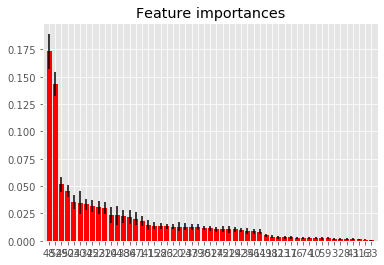

In [170]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

#for f in range(X.shape[1]):
    #print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

for f in range(X.shape[1]):
    print(f+1, var[indices[f]-1] , importances[indices[f]])

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [0]:
predict_fn = lambda x: rfc.predict_proba(x)

In [0]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(X_train ,class_names=['not_adopted','adopted'], feature_names = var,
                                                    kernel_width=3, verbose=True)

In [176]:
i = 100
exp = explainer.explain_instance(X_test[i], predict_fn, num_features=68)

Intercept 0.235556146610986
Prediction_local [0.90617406]
Right: 0.9533333333333334


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.65586e-27): result may not be accurate.
  overwrite_a=True).T


In [177]:
exp.show_in_notebook(show_table=True)

# Logistic Regression

In [178]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [179]:
print('AUC for the current model is', roc_auc_score(y_test, lr.predict(X_test)))

AUC for the current model is 0.5838719277190723


In [0]:
lr.coef_

array([[ 7.05587333e-01, -4.96496984e-01, -1.78810295e-02,
         2.26971379e-01, -5.78584812e-02,  3.07842713e-01,
         1.85813764e-01, -3.31166825e-03,  5.84541778e-01,
         5.12827965e-01,  8.99688852e-03, -1.35171558e+00,
         2.19529673e-02,  5.71583921e-02,  1.32414268e-01,
         1.74338190e-01, -3.05057810e-01,  1.50237309e-01,
         1.35936554e-01, -2.45142336e-02,  9.76680285e-02,
        -8.80895725e-02, -8.41867756e-02,  3.87817763e-02,
        -2.01375772e-01,  2.66663986e-01,  8.01402271e-02,
         1.97156480e-01, -1.16698378e-01,  1.80732779e-01,
         2.48124889e-02, -1.19620998e-01,  6.12314346e-02,
         1.45050489e-01,  3.35825337e-02,  1.86054357e-01,
        -3.91414153e-01, -1.28440002e-01,  2.00494306e-01,
         1.95234695e-01,  1.47161146e-01, -1.46527550e-01,
        -1.62000031e-01, -1.99242150e-01,  7.16860081e-01,
        -1.45801633e-01, -9.51002145e-02,  4.49992197e-01,
        -1.04734057e-01,  2.07621905e-01,  1.06202502e-0

The last five coefficients are for variables [age, quantity, fee, videoAmt, photoAmt]. The coefficient for photoAmt is large and positive, and that means more photo can lead to adoption, same for video amount.

# Neural Network

In [0]:
from keras.layers import *
from keras.models import Sequential

Using TensorFlow backend.


In [0]:
from keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [0]:
# the following code is from 
# https://stackoverflow.com/questions/41032551/how-to-compute-receiving-operating-characteristic-roc-and-auc-in-keras
from keras import backend as K

def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

In [0]:
ncol=X_train.shape[1]
act='selu'
num=30
nn1 = Sequential()
nn1.add(Dense(num,activation=act, input_shape = (ncol,)))
nn1.add(Dropout(0.2))
nn1.add(Dense(num, activation=act))
nn1.add(Dropout(0.2))
nn1.add(Dense(num, activation=act))
nn1.add(Dense(1, activation='sigmoid')) 
nn1.compile(loss='binary_crossentropy', optimizer='adam',metrics=[auc])
nn1.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 30)                2400      
_________________________________________________________________
dropout_33 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_66 (Dense)             (None, 30)                930       
_________________________________________________________________
dropout_34 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_67 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_68 (Dense)             (None, 1)                 31        
Total params: 4,291
Trainable params: 4,291
Non-trainable params: 0
___________________________________________________

In [0]:
history=nn1.fit(X_train,
                    y_train,
                    epochs=500,
                    batch_size=50,
                    validation_data=(X_test, y_test))

Text(0.5, 1.0, 'Training and test AUC')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

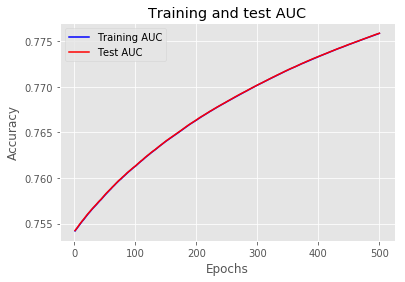

In [0]:
# get the learning curve
loss = history.history['auc']
val_loss = history.history['val_auc']
epochs = range(1, len(loss) + 1);
plt.plot(epochs, loss, 'b', label='Training AUC')
plt.plot(epochs, val_loss, 'r', label='Test AUC')
plt.title('Training and test AUC')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# XGBoost

In [0]:
from xgboost.sklearn import XGBClassifier 
# fit model to training data
xgb_model = XGBClassifier().fit(X_train, y_train)

In [181]:
import shap
# load JS visualization code to notebook
shap.initjs()
explainer = shap.TreeExplainer(xgb_model,X_train)
shap_values = explainer.shap_values(X_train,y_train)
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], var)

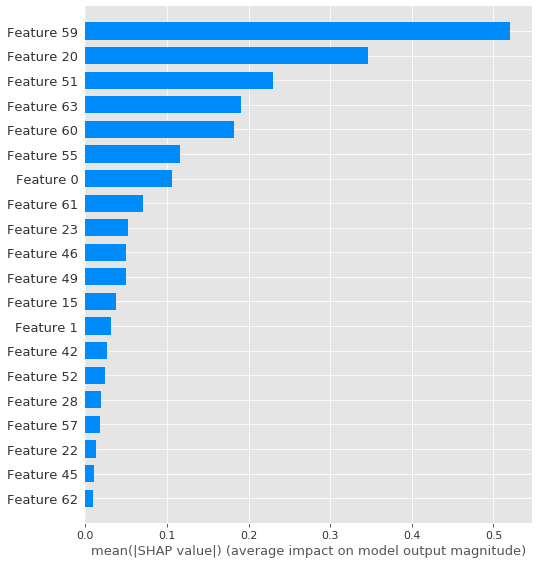

In [137]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

Top predictors:
 state_3, breed_7, sterilized, videoamt, 

In [182]:
print('AUC score for the current model is', roc_auc_score(y_test, xgb_model.predict(X_test)))

AUC score for the current model is 0.6234873986476597


In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, xgb_model.predict(X_test),labels=[0,1])

array([[ 398,  872],
       [ 224, 3004]])

In [30]:
y_test.value_counts()

1    3228
0    1270
Name: AdoptionSpeed, dtype: int64

# text analysis

In [0]:
df = pd.read_csv('/content/drive/My Drive/6211 - project/pet-adoption-prediction/train/train.csv')
text_data = df.Description

In [0]:
text_data.head(20)

0     Nibble is a 3+ month old ball of cuteness. He ...
1     I just found it alone yesterday near my apartm...
2     Their pregnant mother was dumped by her irresp...
3     Good guard dog, very alert, active, obedience ...
4     This handsome yet cute boy is up for adoption....
5     This is a stray kitten that came to my house. ...
6     anyone within the area of ipoh or taiping who ...
7     Siu Pak just give birth on 13/6/10 to 6puppies...
8     healthy and active, feisty kitten found in nei...
9     Very manja and gentle stray cat found, we woul...
10    For serious adopter, please do sms or call for...
11    Kali is a super playful kitten who is on the g...
12    Peanut was an abused puppy until he was rescue...
13    Hi Pet Lovers! This is my first posting and I ...
14    Lost Dog Found (Bandar Menjalara, Kepong／Taman...
15    We moved out of our apartment to a landed home...
16              to be spayed on /12 adorable & friendly
17    shes active... she can obey wht command th

In [73]:
text=text_data.as_matrix()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [0]:
clean_text=[]
for line in text:
  clean_text.append(str(line))

In [0]:
#!pip install langdetect
lang=[]
for line in text_data:
  lang.append(detect(str(line)))

In [0]:
lang.count('en')

14176

In [75]:
# preprocessing text data
from keras.preprocessing.text import Tokenizer
# tokenize the most often 150 words
tokenizer = Tokenizer(num_words=150)
tokenizer.fit_on_texts(clean_text)
word_index = tokenizer.word_index
# convert descriptions into matrix
clean_text=tokenizer.texts_to_matrix(clean_text,mode='binary')
print('Found %s unique tokens.' % len(word_index))

Using TensorFlow backend.


Found 21808 unique tokens.


In [0]:
# separating training sets and test sets
num1, num2, txt1, txt2, labels1, labels2 = train_test_split(
    X, clean_text, y, test_size=0.30, random_state=42)
# Getting the number of features
ncol=X.shape[1]

In [77]:
# First working on the text part
from keras.layers import *
from keras.models import *

# Description input: meant to receive sequences of 150 integers
# Naming this layer by passing it a "name" argument.
text_input = Input(shape=(150,), dtype='int32', name='text_input')

# This embedding layer will encode the input sequence
# into a sequence of dense 512-dimensional vectors.
x = Embedding(output_dim=512, input_dim=10000, input_length=150)(text_input)

# A LSTM will transform the vector sequence into a single vector,
# containing information about the entire sequence
lstm_out = LSTM(32)(x)

In [0]:
# Output of using description to predict price
text_output = Dense(1, activation='sigmoid', name='text_output')(lstm_out)

In [79]:
# Then adding in the non-text part
num_input = Input(shape=(ncol,), name='num_input')
x = Concatenate(axis=-1)([lstm_out, num_input])
act = 'selu'
# Stacking a deep densely-connected network on top
x = Dense(30, activation=act)(x)
x = Dropout(0.2)(x)
x = Dense(30, activation=act)(x)
x = Dropout(0.2)(x)
x = Dense(30, activation=act)(x)

# And finally adding the main fitting output
main_output = Dense(1, activation='sigmoid', name='main_output')(x)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# Putting the model together with two inputs and one outputs
nn2 = Model(inputs=[text_input, num_input], outputs=[main_output, text_output])

In [83]:
# Compiling and fitting the neural network
# Since we have more inputs, I changed the batch size into 100.
nn2.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=[auc],
              loss_weights=[1, 1])
history_nn2=nn2.fit([txt1, num1], [labels1, labels1],
                  epochs=10, batch_size=50, 
                  validation_data=([txt2, num2], [labels2, labels2]))



Instructions for updating:
Deprecated in favor of operator or tf.math.divide.








Train on 10495 samples, validate on 4498 samples
Epoch 1/10
10495/10495 [==============================] - 90s 9ms/step - loss: 1.1886 - main_output_loss: 0.5924 - text_output_loss: 0.5962 - main_output_auc: 0.5487 - text_output_auc: 0.4910 - val_loss: 1.1539 - val_main_output_loss: 0.5590 - val_text_output_loss: 0.5950 - val_main_output_auc: 0.5955 - val_text_output_auc: 0.4952
Epoch 2/10
10495/10495 [==============================] - 87s 8ms/step - loss: 1.1568 - main_output_loss: 0.5648 - text_output_loss: 0.5921 - main_output_auc: 0.6149 - text_output_auc: 0.4974 - val_loss: 1.1440 - val_main_output_loss: 0.5460 - val_text_output_loss: 0.5980 - val_main_output_auc: 0.6299 - val_text_output_auc: 0.5021
Epoch 3/10
10495/10495 [==============================] - 87s 8ms/step - loss: 1.1525 - main_output_loss: 0.5581 - text_output_loss: 0.5944 - main_output_auc: 0.6396 - text_output_auc: 0.5011 - val

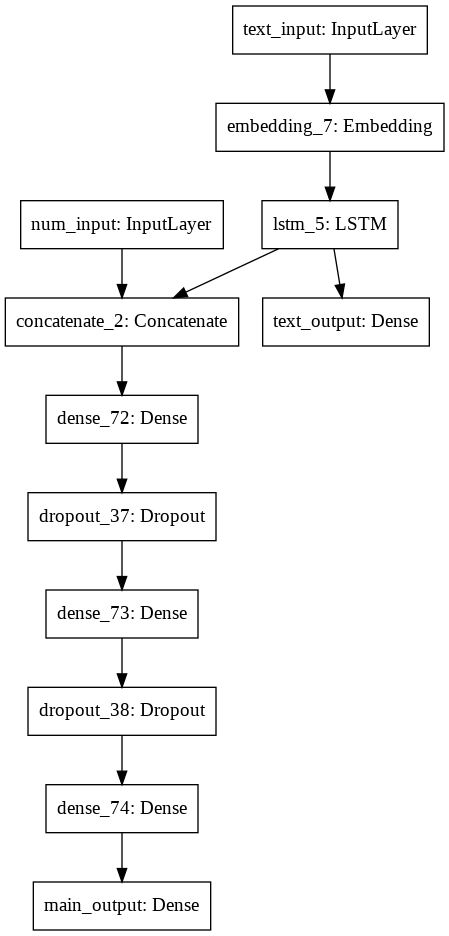

In [0]:
from keras.utils import plot_model
plot_model(nn2, to_file='model2.png')